## Data Exploration

My task during this test is to analyse data of yellow cab trips in NYC, and build a model that is able to suggest a passenger the amount of tip after their ride. 

The data contains taxi rides from the months of March, June and November of 2017. Each month's data is stored in a CSV file. An accompanying pdf file explains the meaning of the columns.

First let's take a quick look at the data

In [1]:
#Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gc
import warnings
warnings.filterwarnings('ignore')
import geopandas
import os

In [2]:
#Download the data
os.chdir('./data')
!wget 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2017-03.csv'
!wget 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2017-06.csv'
!wget 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2017-11.csv'
os.chdir('..')

In [3]:
#Loading the data
march = pd.read_csv('./data/yellow_tripdata_2017-03.csv')
june = pd.read_csv('./data/yellow_tripdata_2017-06.csv')
nov = pd.read_csv('./data/yellow_tripdata_2017-11.csv')
df = pd.concat([march, june, nov], ignore_index=True)
del march, june, nov
gc.collect()

10

In [4]:
#General information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29236424 entries, 0 to 29236423
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
dtypes: float64(8), int64(6), object(3)
memory usage: 3.7+ GB


In [5]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1,N,48,107,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,1,10.0,0.5,0.5,2.82,0.0,0.3,14.12
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,1,12.0,0.5,0.5,3.99,0.0,0.3,17.29
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1,N,41,162,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30
5,1,2017-03-01 00:00:00,2017-03-01 00:14:22,1,2.80,1,N,261,79,1,12.5,0.5,0.5,1.00,0.0,0.3,14.80
6,1,2017-03-01 00:00:00,2017-03-01 00:19:30,1,6.00,1,N,87,142,1,19.5,0.5,0.5,3.50,0.0,0.3,24.30
7,1,2017-03-01 00:00:00,2017-03-01 00:34:27,1,8.70,1,N,142,181,1,30.0,0.5,0.5,7.80,0.0,0.3,39.10
8,1,2017-03-01 00:00:00,2017-03-01 00:21:31,1,3.70,1,N,68,141,1,16.5,0.5,0.5,1.50,0.0,0.3,19.30
9,2,2017-03-15 00:07:59,2017-03-15 00:38:08,1,4.21,1,N,261,163,1,20.5,0.0,0.5,4.26,0.0,0.3,25.56


In [6]:
#Number of unique values in each column
df.nunique()

VendorID                       2
tpep_pickup_datetime     7021748
tpep_dropoff_datetime    7032908
passenger_count               11
trip_distance               5485
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 262
DOLocationID                 263
payment_type                   5
fare_amount                 3442
extra                         76
mta_tax                       46
tip_amount                  4742
tolls_amount                1918
improvement_surcharge          7
total_amount               16789
dtype: int64

In [7]:
#Number of missing values in each column
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [8]:
#List unique values of some of the columns
for col in ['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'payment_type']:
    print(f'{col}: {df[col].unique()}')

VendorID: [2 1]
passenger_count: [  1   2   5   3   4   6   0   9   8   7 192]
RatecodeID: [ 1  5  2  3  4 99  6]
store_and_fwd_flag: ['N' 'Y']
payment_type: [1 2 3 4 5]


In [9]:
#There's a strange value in the passenger count column
df[df['passenger_count']==192]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
28795318,2,2017-11-29 18:49:11,2017-11-29 18:55:47,192,1.07,1,N,158,68,1,6.5,1.0,0.5,1.24,0.0,0.3,9.54


In [10]:
#Take a look at the numerical columns
#df[['trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'improvement_surcharge', 'total_amount']].describe()
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07
mean,1.545904e+00,1.617798e+00,2.919386e+00,1.043350e+00,1.632024e+02,1.611910e+02,1.329500e+00,1.310930e+01,3.339407e-01,4.973104e-01,1.874055e+00,3.290113e-01,2.996283e-01,1.644710e+01
std,4.978884e-01,1.260992e+00,4.476535e+00,5.095108e-01,6.661417e+01,7.047819e+01,4.903471e-01,1.472817e+02,4.615744e-01,7.081708e-02,2.645570e+00,1.968881e+00,1.408904e-02,1.475248e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.500000e+02,-5.371000e+01,-5.000000e-01,-1.120000e+02,-1.750000e+01,-3.000000e-01,-5.503000e+02
25%,1.000000e+00,1.000000e+00,9.700000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,3.010000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,2.000000e+00,1.920000e+02,9.496980e+03,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,6.304618e+05,6.980000e+01,1.400000e+02,4.500000e+02,1.018950e+03,1.000000e+00,6.304631e+05


In [11]:
#There are some strangely hight total_amount values
df[df['total_amount']>1000].head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
592656,1,2017-03-01 16:58:17,2017-03-01 18:14:19,1,18.6,3,N,161,1,3,82.00,0.00,0.00,0.0,923.5,0.3,1005.80
971076,1,2017-03-02 17:57:18,2017-03-02 18:20:10,1,4.1,1,N,264,264,3,8015.00,-13.68,14.48,0.0,0.0,0.0,8015.80
1926622,1,2017-03-04 21:27:09,2017-03-04 21:43:13,2,3.5,1,N,264,264,3,3012.00,-53.71,54.51,0.0,0.0,0.0,3012.80
1960809,1,2017-03-04 22:38:45,2017-03-04 22:44:54,1,1.7,1,N,264,264,3,8006.50,-45.72,46.52,0.0,0.0,0.0,8007.30
2310518,1,2017-03-05 21:21:56,2017-03-05 21:31:20,2,2.4,1,N,264,264,3,3008.00,0.00,0.50,0.0,0.0,0.3,3008.80
3955474,1,2017-03-10 13:12:57,2017-03-10 13:56:48,5,25.9,3,N,158,1,3,86.50,0.00,0.00,0.0,919.5,0.3,1006.30
4146145,1,2017-03-11 23:07:12,2017-03-11 23:21:00,1,3.2,1,N,264,264,2,3011.00,-17.73,18.53,0.0,0.0,0.0,3011.80
4835686,1,2017-03-13 23:36:19,2017-03-13 23:40:36,1,1.6,1,N,264,264,2,8005.50,-52.73,53.53,0.0,0.0,0.0,8006.30
6617066,1,2017-03-25 14:40:26,2017-03-25 14:40:58,1,0.0,4,N,144,144,3,2759.07,0.00,0.00,0.0,0.0,0.3,2759.37
6618420,1,2017-03-25 14:45:26,2017-03-25 14:45:29,1,0.0,4,N,148,148,3,2759.07,0.00,0.00,0.0,0.0,0.3,2759.37


#### Summary

The entire dataset contains almost 30 million entries. There are no obvious missing values in the data. There are two columns with datetime objects, several categorical columns encoded as integers, and some columns with floats. At the first look, there are some strange entries, such as an entry with a passenger count of 192, or several really short, but very expensive trips.

Let's take a bit deeper look at the columns.

### fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount

First let's take a look at the different columns that add up the cost of the trips. 

In [12]:
df[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']].describe()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07
mean,1.310930e+01,3.339407e-01,4.973104e-01,1.874055e+00,3.290113e-01,2.996283e-01,1.644710e+01
std,1.472817e+02,4.615744e-01,7.081708e-02,2.645570e+00,1.968881e+00,1.408904e-02,1.475248e+02
min,-5.500000e+02,-5.371000e+01,-5.000000e-01,-1.120000e+02,-1.750000e+01,-3.000000e-01,-5.503000e+02
25%,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,1.450000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,6.304618e+05,6.980000e+01,1.400000e+02,4.500000e+02,1.018950e+03,1.000000e+00,6.304631e+05


There are cases where the total_amount paid is a negative value. Let's check if any of them include a positive amount of tip.

In [13]:
#Find entries where the total_amount is negative but the tip_amount is positive.
df[(df['total_amount']<0) & (df['tip_amount']>0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount


The total amount is supposed to be the total of the different costs. Let's double check if this is true.

In [14]:
#find columns where the sum of the different costs is different from the total_amount
df[df[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']].sum(axis=1) - df['total_amount']>1e3][['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']].head()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount


In the pdf explaining the contents of the columns it is noted that the column 'total_amount' includes the tips when the passenger paid by credit card. Let's check if there's any tip included with other payment types.

In [15]:
#Number of entries with payment_type other than credit card
df[df['payment_type']!=1]['payment_type'].count()

9391893

In [16]:
#Number of entries where the payment_type is not credit card and the tip_amount is not zero
df[(df['payment_type']!=1) & (df['tip_amount']!=0)]['payment_type'].count()

475

Out of the almost 10 million transactions made by other than credit card only 475 includes a tip. Below is the distribution of all of the tips (left) and the tips of the credit card payments (right). 

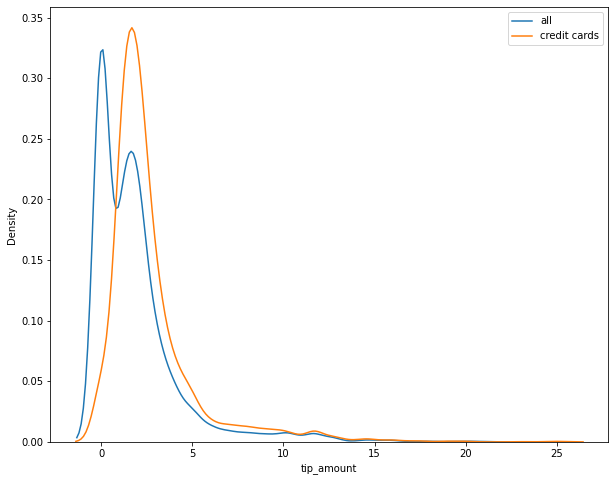

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df['tip_amount'].sample(5000), ax=ax, hist=False, label='all')
sns.distplot(df[df['payment_type']==1]['tip_amount'].sample(5000), ax=ax, hist=False, label='credit cards')
ax.legend()

Since the goal of this project is to predict tips, any entry without tips is useless. Therefore from now on I will only focus on the credit card payments.

In [18]:
#Keep only credit card paid entries
df = df[df['payment_type']==1]
df.drop(['payment_type'],axis=1, inplace=True)
df.shape

(19844531, 16)

The total_amount column includes the tip, so let's create a column of the total amount without the tip.

In [19]:
#Add up the costs without the tip included
df['total_amount_without_tip'] = df[['fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge']].sum(axis=1).round(2)
gc.collect()

0

<AxesSubplot:xlabel='total_amount_without_tip', ylabel='tip_amount'>

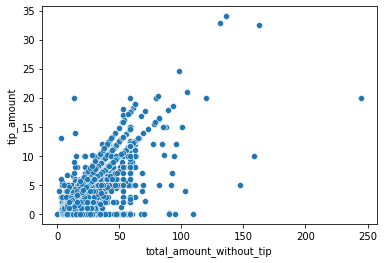

In [20]:
sns.scatterplot(data=df.sample(10000), x='total_amount_without_tip', y='tip_amount')

There are entries where the amount of the tip is unusually high:

In [21]:
df[df['tip_amount']>df['total_amount_without_tip']].head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,total_amount_without_tip
2681,1,2017-03-10 14:18:00,2017-03-10 14:37:14,1,6.5,1,N,244,265,21.0,0.0,0.5,68.0,10.5,0.3,100.3,32.3
3743,1,2017-03-10 14:21:39,2017-03-10 14:21:41,1,4.6,1,N,237,237,2.5,0.0,0.5,15.0,0.0,0.3,18.3,3.3
4491,1,2017-03-10 14:24:12,2017-03-10 14:24:14,1,0.0,1,N,211,211,2.5,0.0,0.5,5.0,0.0,0.3,8.3,3.3
4915,1,2017-03-10 14:25:42,2017-03-10 14:27:09,1,0.8,1,N,236,236,3.0,0.0,0.5,50.0,0.0,0.3,53.8,3.8
7073,2,2017-03-10 14:33:02,2017-03-10 14:33:06,1,0.0,1,N,236,236,2.5,0.0,0.5,5.0,0.0,0.3,8.3,3.3
7478,1,2017-03-10 14:34:27,2017-03-10 14:34:36,1,0.0,1,N,138,138,2.5,0.0,0.5,10.0,0.0,0.3,13.3,3.3
7551,2,2017-03-10 14:34:45,2017-03-10 14:34:58,1,0.0,1,N,230,230,2.5,0.0,0.5,10.0,0.0,0.3,13.3,3.3
8236,1,2017-03-10 14:37:05,2017-03-10 14:37:08,1,1.8,1,N,162,162,2.5,0.0,0.5,11.0,0.0,0.3,14.3,3.3
12537,1,2017-03-10 14:50:29,2017-03-10 14:52:45,1,0.3,1,N,107,107,3.5,0.0,0.5,5.0,0.0,0.3,9.3,4.3
12665,1,2017-03-10 14:50:54,2017-03-10 14:53:31,1,0.1,1,N,144,144,3.5,0.0,0.5,5.0,0.0,0.3,9.3,4.3


In [22]:
df[df['tip_amount']>df['total_amount_without_tip']]['tip_amount'].count()

18671

### VendorID

There are 2 kinds of vendors.

In [23]:
df['VendorID'].value_counts()

2    10880495
1     8964036
Name: VendorID, dtype: int64

Both provider is represented almost equally.

### tpep_pickup_datetime and tpep_dropoff_datetime

These ones are the pickup and dropoff times, they are probably more useful converted into datetime formats.

In [24]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [25]:
#Creating features based on the pickup and dropoff times
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day_PU'] = df['tpep_pickup_datetime'].dt.day
df['day_DO'] = df['tpep_dropoff_datetime'].dt.day
df['dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
df['hour_PU'] = df['tpep_pickup_datetime'].dt.hour
df['hour_DO'] = df['tpep_dropoff_datetime'].dt.hour

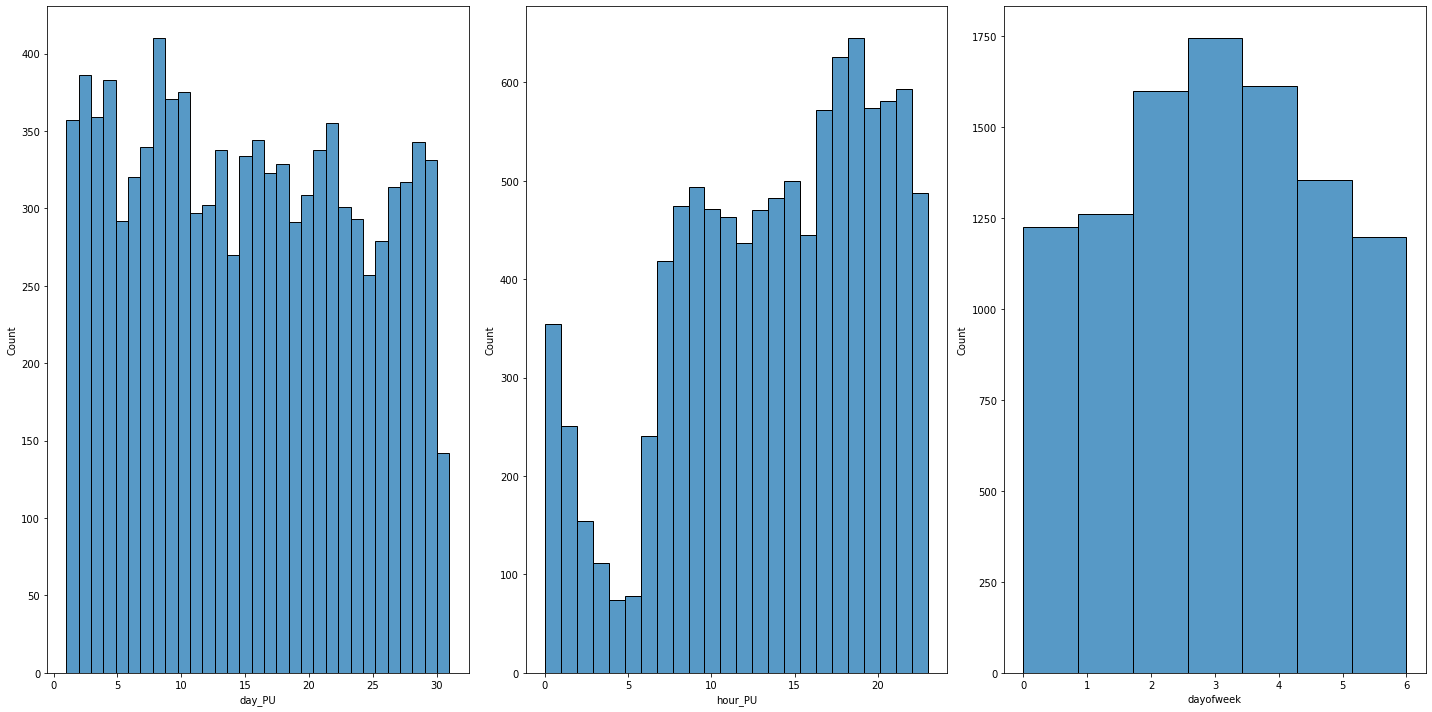

In [26]:
#Some quick plots, sampling the data
fig, ax = plt.subplots(1, 3, figsize=(20,10), )
#fig.suptitle('Mean tip amount per taxi zones', fontsize=20)
sns.histplot(df['day_PU'].sample(10000),bins=31,  ax=ax[0])
#ax[0].set_title('Pickup', fontsize=16)

sns.histplot(df['hour_PU'].sample(10000), bins=24, ax=ax[1])
#ax[1].set_title('Dropoff', fontsize=16)

sns.histplot(df['dayofweek'].sample(10000), bins=7, ax=ax[2])
#ax[1].set_title('Dropoff', fontsize=16)
fig.tight_layout()

### trip_distance

In [27]:
#The majority of the trips are short.
df['trip_distance'].describe()

count    1.984453e+07
mean     3.067932e+00
std      3.817437e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.700000e+00
75%      3.200000e+00
max      7.025000e+02
Name: trip_distance, dtype: float64

In [28]:
#Cost per mile
(df[df['trip_distance']>0]['total_amount_without_tip']/df[df['trip_distance']>0]['trip_distance']).describe()

count    1.976972e+07
mean     7.560795e+00
std      5.663953e+01
min     -1.650000e+02
25%      4.708333e+00
50%      6.181818e+00
75%      8.076923e+00
max      3.208000e+04
dtype: float64

There are some strangely hight cost per mile values

In [29]:
(df[df['trip_distance']>0]['total_amount_without_tip']/df[df['trip_distance']>0]['trip_distance']).sort_values(ascending=False).head(10)

19892667    32080.0
6333969     30080.0
7256023     30030.0
6879091     30030.0
18302488    27356.0
19541238    25080.0
8462202     21680.0
2769076     20100.0
27103774    18080.0
6975295     18030.0
dtype: float64

In [30]:
#Number of trips with highter than 30 dollars per mile fare.
df2 = df[df['trip_distance']>0]['total_amount_without_tip']/df[df['trip_distance']>0]['trip_distance']
df2[df2>30].count()

46265

### passenger_count

In [31]:
df['passenger_count'].value_counts()

1      14372788
2       2792865
5        947421
3        781269
6        577417
4        337850
0         34725
8            72
7            72
9            51
192           1
Name: passenger_count, dtype: int64

In [32]:
#There's a lot of trips with 0 passengers
df[df['passenger_count']==0].head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,total_amount_without_tip,month,day_PU,day_DO,dayofweek,hour_PU,hour_DO
4900,1,2017-03-10 14:25:40,2017-03-10 14:25:40,0,0.0,99,N,264,264,117.00,...,0.0,0.0,117.00,117.00,3,10,10,4,14,14
11857,1,2017-03-10 14:48:25,2017-03-10 14:48:25,0,0.0,99,N,264,264,7.55,...,0.0,0.0,7.55,7.55,3,10,10,4,14,14
197676,2,2017-03-10 22:50:47,2017-03-10 22:50:50,0,0.0,5,N,236,236,14.50,...,0.0,0.3,19.12,15.30,3,10,10,4,22,22
210864,2,2017-03-10 23:24:59,2017-03-10 23:25:06,0,0.0,5,N,265,265,87.00,...,0.0,0.3,105.36,87.80,3,10,10,4,23,23
270075,2,2017-03-11 02:10:22,2017-03-11 02:10:37,0,0.0,5,N,37,37,27.00,...,0.0,0.3,34.75,27.80,3,11,11,5,2,2
277251,2,2017-03-11 02:45:12,2017-03-11 02:45:19,0,0.0,5,N,41,41,18.50,...,0.0,0.3,23.16,19.30,3,11,11,5,2,2
282743,2,2017-03-11 03:16:05,2017-03-11 03:16:08,0,0.0,5,N,137,137,12.00,...,0.0,0.3,13.88,12.80,3,11,11,5,3,3
506566,2,2017-03-01 12:19:34,2017-03-01 12:19:39,0,0.0,5,N,170,170,30.50,...,0.0,0.3,37.56,31.30,3,1,1,2,12,12
517145,2,2017-03-01 13:00:50,2017-03-01 13:01:10,0,0.0,5,N,236,236,4.00,...,0.0,0.3,5.76,4.80,3,1,1,2,13,13
526821,1,2017-03-01 13:39:00,2017-03-01 13:39:00,0,0.0,99,Y,163,264,12.70,...,0.0,0.0,12.70,12.70,3,1,1,2,13,13


In [33]:
df[(df['passenger_count']==0) & (df['trip_distance']>0)].head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,total_amount_without_tip,month,day_PU,day_DO,dayofweek,hour_PU,hour_DO
717129,2,2017-03-01 23:10:12,2017-03-01 23:10:21,0,0.01,5,N,265,265,60.0,...,0.00,0.3,65.85,60.30,3,1,1,2,23,23
763058,2,2017-03-02 07:00:11,2017-03-02 07:00:22,0,0.04,5,N,143,143,8.0,...,0.00,0.3,10.56,8.80,3,2,2,3,7,7
1384534,1,2017-03-03 17:50:45,2017-03-03 17:50:47,0,1.40,5,N,1,1,85.5,...,0.00,0.3,100.80,85.80,3,3,3,4,17,17
1433410,2,2017-03-03 19:24:24,2017-03-03 19:24:27,0,0.01,5,N,114,114,23.0,...,0.00,0.3,28.56,23.80,3,3,3,4,19,19
1824731,2,2017-03-11 15:33:40,2017-03-11 16:35:40,0,24.77,5,N,138,265,105.0,...,18.04,0.3,138.84,123.84,3,11,11,5,15,16
1890837,2,2017-03-04 20:07:25,2017-03-04 20:07:28,0,0.04,5,N,262,262,13.5,...,0.00,0.3,17.16,14.30,3,4,4,5,20,20
1987253,2,2017-03-04 23:46:55,2017-03-04 23:56:01,0,3.42,5,N,249,265,50.0,...,0.00,0.3,50.80,50.80,3,4,4,5,23,23
2100555,2,2017-03-05 09:58:07,2017-03-05 10:27:22,0,8.95,5,N,14,13,49.5,...,0.00,0.3,65.39,50.30,3,5,5,6,9,10
2464814,2,2017-03-06 12:04:40,2017-03-06 13:10:22,0,30.04,5,N,223,265,125.0,...,16.04,0.3,170.21,141.84,3,6,6,0,12,13
2468870,2,2017-03-06 12:20:22,2017-03-06 12:20:47,0,0.49,5,N,107,234,20.0,...,0.00,0.3,21.30,20.80,3,6,6,0,12,12


There are several trips with 0 passengers and 1 with 192. Since they are rare, I will not remove them from the data. Usually a small number of errors don't interfere with the model, instead they help to represent real world situationxs.

### RateCodeID

In [34]:
df['RatecodeID'].value_counts()

1     19246763
2       466272
5        75380
3        45850
4         9842
99         406
6           18
Name: RatecodeID, dtype: int64

In [35]:
# The value 99 has no explanation in the documentation. 
df[df['RatecodeID']==99].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,total_amount_without_tip,month,day_PU,day_DO,dayofweek,hour_PU,hour_DO
4900,1,2017-03-10 14:25:40,2017-03-10 14:25:40,0,0.0,99,N,264,264,117.00,...,0.0,0.0,117.00,117.00,3,10,10,4,14,14
11857,1,2017-03-10 14:48:25,2017-03-10 14:48:25,0,0.0,99,N,264,264,7.55,...,0.0,0.0,7.55,7.55,3,10,10,4,14,14
526821,1,2017-03-01 13:39:00,2017-03-01 13:39:00,0,0.0,99,Y,163,264,12.70,...,0.0,0.0,12.70,12.70,3,1,1,2,13,13
561863,1,2017-03-01 15:07:51,2017-03-01 15:07:51,0,0.0,99,N,264,264,118.04,...,0.0,0.3,138.84,118.84,3,1,1,2,15,15
781108,1,2017-03-02 08:01:04,2017-03-02 08:01:04,0,0.0,99,N,264,264,16.00,...,0.0,0.0,16.00,16.00,3,2,2,3,8,8


In [36]:
df[(df['RatecodeID']==99) & (df['trip_distance']!=0)].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,total_amount_without_tip,month,day_PU,day_DO,dayofweek,hour_PU,hour_DO
6694366,1,2017-03-25 18:29:15,2017-03-25 18:35:35,2,1.6,99,N,145,112,7.5,...,0.0,0.3,9.30,8.3,3,25,25,5,18,18
10942680,1,2017-06-11 01:36:50,2017-06-11 01:59:29,1,10.6,99,N,231,223,31.5,...,0.0,0.3,39.35,32.8,6,11,11,6,1,1
13559971,1,2017-06-13 19:38:29,2017-06-13 19:47:24,1,2.2,99,N,100,237,9.0,...,0.0,0.3,12.95,10.8,6,13,13,1,19,19
14450234,1,2017-06-16 08:54:45,2017-06-16 09:16:41,1,2.5,99,N,161,79,14.5,...,0.0,0.3,18.35,15.3,6,16,16,4,8,9
17747664,1,2017-06-25 18:04:40,2017-06-25 18:13:21,1,1.6,99,N,162,141,8.0,...,0.0,0.3,10.55,8.8,6,25,25,6,18,18


### PULocationID and DOLocationID

These two columns contain the ID of the pickup and dropoff zones. 

The webpage of the data contains the lookup file for these zones:

In [37]:
taxi_zones = pd.read_csv('./data/taxi+_zone_lookup.csv') 

In [38]:
taxi_zones.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [39]:
taxi_zones.tail()

,LocationID,Borough,Zone,service_zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN
264,265,Unknown,NaN,NaN


In [40]:
taxi_zones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [41]:
print(taxi_zones['Borough'].nunique(), taxi_zones['Zone'].nunique(), taxi_zones['service_zone'].nunique())

7 261 4


In [42]:
print(taxi_zones['Borough'].unique(), taxi_zones['service_zone'].unique())

['EWR' 'Queens' 'Bronx' 'Manhattan' 'Staten Island' 'Brooklyn' 'Unknown'] ['EWR' 'Boro Zone' 'Yellow Zone' 'Airports' nan]


In [43]:
for col in taxi_zones['service_zone'].unique():
    print(col, taxi_zones[taxi_zones['service_zone']==col]['Borough'].unique(), '\n')

EWR ['EWR'] 

Boro Zone ['Queens' 'Bronx' 'Staten Island' 'Brooklyn' 'Manhattan'] 

Yellow Zone ['Manhattan'] 

Airports ['Queens'] 

nan [] 



There are 265 zones, each belongs to one of the 6 boroughs and one of the 4 service zones. There are a few NaN and Unknown values.
Let's merge these data with the taxi trips.

In [44]:
df = df.merge(taxi_zones, how='left', left_on='PULocationID', right_on='LocationID')

In [45]:
df = df.merge(taxi_zones, how='left', left_on='DOLocationID', right_on='LocationID', suffixes=(None, '_DO'))

In [46]:
df = df.rename(columns={'Borough': 'Borough_PU', 'service_zone': 'service_zone_PU', 'Zone': 'Zone_PU'})
df.drop(['LocationID', 'LocationID_DO'], axis=1, inplace=True)
gc.collect()

85

In [47]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,...,day_DO,dayofweek,hour_PU,hour_DO,Borough_PU,Zone_PU,service_zone_PU,Borough_DO,Zone_DO,service_zone_DO
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,14.0,...,9,3,21,21,Manhattan,Lower East Side,Yellow Zone,Manhattan,Clinton East,Yellow Zone
1,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,10.0,...,9,3,22,22,Manhattan,East Village,Yellow Zone,Manhattan,Midtown East,Yellow Zone
2,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,12.0,...,10,3,22,6,Manhattan,Upper East Side South,Yellow Zone,Manhattan,Central Harlem,Boro Zone
3,1,2017-03-01 00:00:00,2017-03-01 00:14:22,1,2.80,1,N,261,79,12.5,...,1,2,0,0,Manhattan,World Trade Center,Yellow Zone,Manhattan,East Village,Yellow Zone
4,1,2017-03-01 00:00:00,2017-03-01 00:19:30,1,6.00,1,N,87,142,19.5,...,1,2,0,0,Manhattan,Financial District North,Yellow Zone,Manhattan,Lincoln Square East,Yellow Zone


The website of the data also includes the shapefiles of the taxi zones. Let's try to visualize our data.

In [48]:
#Load shapefile
shape = './data/taxi_zones/taxi_zones.shp'
zone_shapes = geopandas.read_file(shape)

In [49]:
zone_shapes.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."


In [50]:
zone_shapes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int64   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int64   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 14.5+ KB


In [51]:
#I will visualize the average tip amount, and the number of trips per zone for both pickup and dropoff.
df_PU=df.groupby('PULocationID')['tip_amount'].agg(['mean', 'count']).reset_index()
df_DO=df.groupby('DOLocationID')['tip_amount'].agg(['mean', 'count']).reset_index()
df_PU.head()

,PULocationID,mean,count
0,1,13.376485,1636
1,2,7.061579,19
2,3,2.839111,45
3,4,2.351583,48583
4,5,5.000000,2


In [52]:
zone_shapes = zone_shapes.merge(df_PU, left_on='LocationID', right_on='PULocationID').merge(df_DO, left_on='LocationID', right_on='DOLocationID', suffixes=('_PU','_DO'))

In [53]:
zone_shapes.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,mean_PU,count_PU,DOLocationID,mean_DO,count_DO
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1,13.376485,1636,1,14.470256,46454
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2,7.061579,19,2,8.731429,7
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ...",3,2.839111,45,3,6.359371,811
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4,2.351583,48583,4,2.271078,95470
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14...",5,5.000000,2,5,15.880198,101


In [54]:
import contextily as ctx
zone_shapes = zone_shapes.to_crs(epsg=3857)

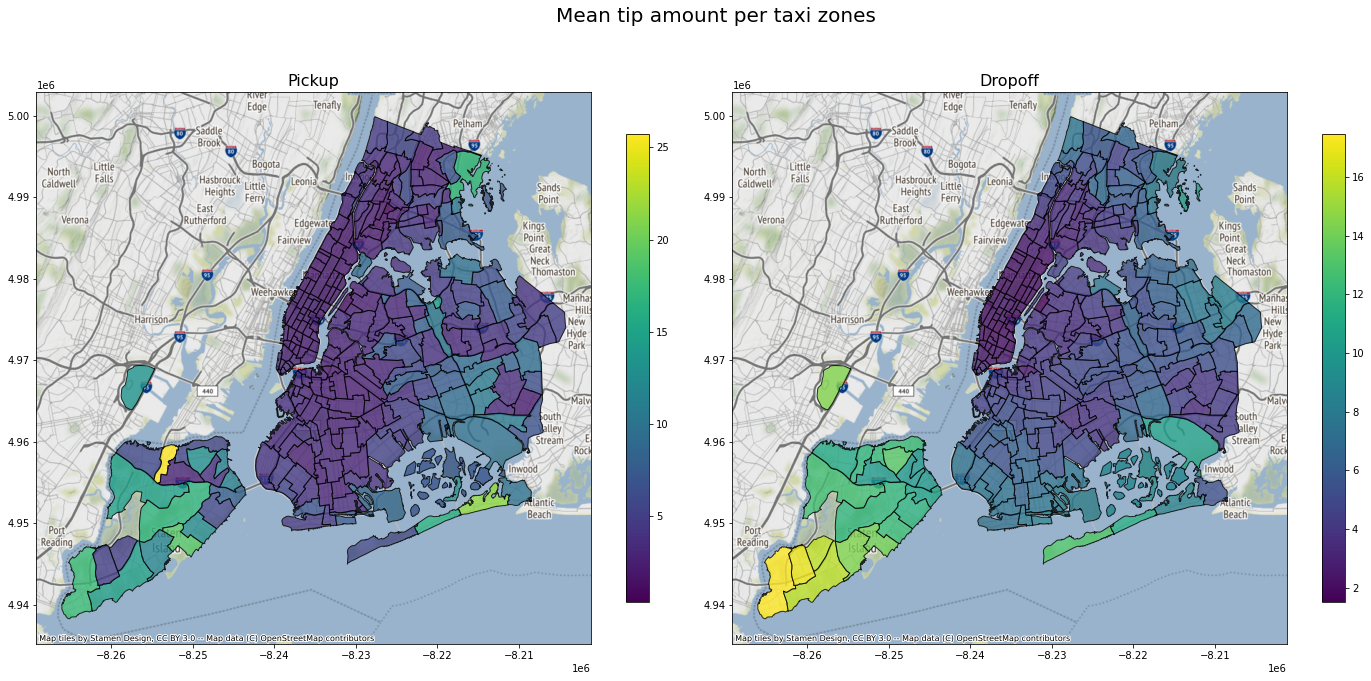

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Mean tip amount per taxi zones', fontsize=20)
zone_shapes.plot(column='mean_PU', ax=ax[0], alpha=0.8, edgecolor='k', legend=True, legend_kwds={'shrink': 0.7})
ctx.add_basemap(ax[0])
ax[0].set_title('Pickup', fontsize=16)
zone_shapes.plot(column='mean_DO', ax=ax[1], alpha=0.8, edgecolor='k', legend=True, legend_kwds={'shrink': 0.7})
ctx.add_basemap(ax[1])
ax[1].set_title('Dropoff', fontsize=16)
fig.tight_layout()

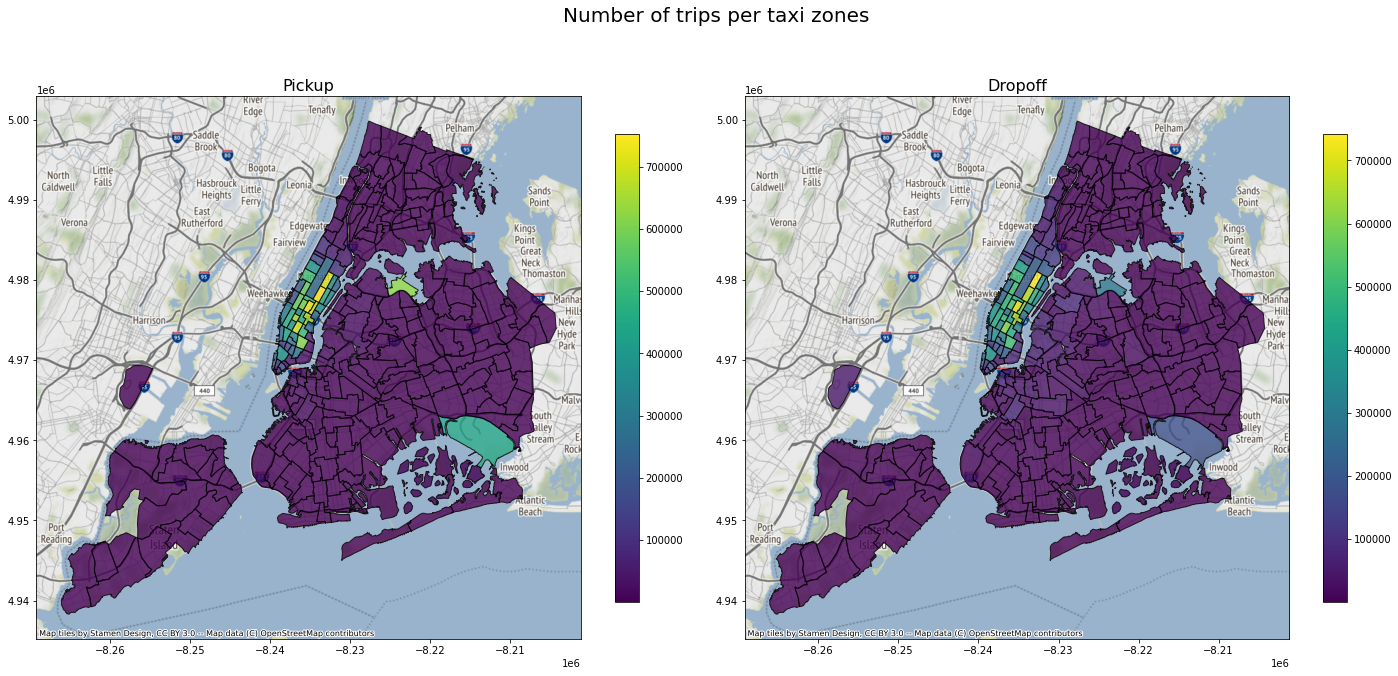

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Number of trips per taxi zones', fontsize=20)
zone_shapes.plot(column='count_PU', ax=ax[0], alpha=0.8, edgecolor='k', legend=True, legend_kwds={'shrink': 0.7})
ctx.add_basemap(ax[0])
ax[0].set_title('Pickup', fontsize=16)
zone_shapes.plot(column='count_DO', ax=ax[1], alpha=0.8, edgecolor='k', legend=True, legend_kwds={'shrink': 0.7})
ctx.add_basemap(ax[1])
ax[1].set_title('Dropoff', fontsize=16)
fig.tight_layout()

In [57]:
zone_shapes.sort_values(by='count_PU', ascending=True).head(10)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,mean_PU,count_PU,DOLocationID,mean_DO,count_DO
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-8257036.109 4948033.095, -8256954.5...",5,5.000000,2,5,15.880198,101
26,27,0.202509,0.001341,Breezy Point/Fort Tilden/Riis Beach,27,Queens,"POLYGON ((-8222639.296 4949189.354, -8222563.1...",27,5.920000,3,27,12.818254,126
239,245,0.095983,0.000466,West Brighton,245,Staten Island,"POLYGON ((-8248538.236 4959438.413, -8248515.2...",245,12.775000,4,245,13.289063,192
58,59,0.037795,0.000063,Crotona Park,59,Bronx,"POLYGON ((-8225332.303 4988685.328, -8225251.3...",59,0.375000,4,59,3.420600,50
43,44,0.235689,0.001945,Charleston/Tottenville,44,Staten Island,"POLYGON ((-8261264.353 4947135.681, -8261409.2...",44,17.484000,5,44,17.481774,62
181,187,0.126868,0.000421,Port Richmond,187,Staten Island,"MULTIPOLYGON (((-8252598.392 4959662.686, -825...",187,25.736000,5,187,11.926400,75
170,176,0.151995,0.000658,Oakwood,176,Staten Island,"POLYGON ((-8251209.046 4949870.698, -8251209.0...",176,18.932000,5,176,14.009927,137
83,84,0.233624,0.002074,Eltingville/Annadale/Prince's Bay,84,Staten Island,"POLYGON ((-8255459.819 4942915.636, -8255440.3...",84,14.276000,5,84,15.815455,110
45,46,0.134475,0.000926,City Island,46,Bronx,"MULTIPOLYGON (((-8213655.676 4991783.793, -821...",46,6.918333,6,46,9.789046,283
29,30,0.094510,0.000146,Broad Channel,30,Queens,"POLYGON ((-8217689.294 4955753.159, -8217347.2...",30,12.810000,6,30,9.113810,42


In [58]:
zone_shapes.sort_values(by='count_PU', ascending=True).tail(10)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,mean_PU,count_PU,DOLocationID,mean_DO,count_DO
224,230,0.031028,0.000056,Times Sq/Theatre District,230,Manhattan,"POLYGON ((-8235819.388 4976346.988, -8235874.2...",230,2.918897,603668,230,2.932685,526035
78,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((-8235836.707 4971354.640, -8235841.6...",79,2.324913,614826,79,2.224761,515422
132,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((-8223309.774 4980833.380, -822...",138,7.421858,618972,138,7.535576,285925
180,186,0.024696,0.000037,Penn Station/Madison Sq West,186,Manhattan,"POLYGON ((-8236636.918 4974863.512, -8236687.0...",186,2.575260,650796,186,2.391845,487178
164,170,0.045769,0.000074,Murray Hill,170,Manhattan,"POLYGON ((-8234529.081 4974919.946, -8234539.7...",170,2.440758,666492,170,2.296030,657471
228,234,0.036072,0.000073,Union Sq,234,Manhattan,"POLYGON ((-8236525.713 4973318.432, -8236518.3...",234,2.321541,700878,234,2.118000,597761
156,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((-8234438.215 4976299.518, -8234489.4...",162,2.599566,702964,162,2.559604,605215
230,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((-8232943.947 4979004.836, -8232995.3...",236,2.130528,710803,236,2.058093,742637
155,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((-8234897.601 4976315.150, -8234949.2...",161,2.615711,737028,161,2.485044,715049
231,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((-8233871.646 4977326.198, -8233922.3...",237,2.060550,754351,237,2.055474,664459


In [59]:
zone_shapes.sort_values(by='mean_PU', ascending=True).head(10)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,mean_PU,count_PU,DOLocationID,mean_DO,count_DO
58,59,0.037795,0.000063,Crotona Park,59,Bronx,"POLYGON ((-8225332.303 4988685.328, -8225251.3...",59,0.375000,4,59,3.420600,50
187,193,0.065530,0.000146,Queensbridge/Ravenswood,193,Queens,"POLYGON ((-8230431.841 4978405.968, -8230492.4...",193,1.344525,6617,193,1.524264,9470
161,167,0.090816,0.000168,Morrisania/Melrose,167,Bronx,"POLYGON ((-8226165.299 4987450.974, -8226195.5...",167,1.652574,202,167,3.097548,1725
46,47,0.089828,0.000163,Claremont/Bathgate,47,Bronx,"POLYGON ((-8225497.589 4990847.692, -8225638.3...",47,1.815361,97,47,2.918116,934
141,147,0.058765,0.000106,Longwood,147,Bronx,"POLYGON ((-8225970.779 4986980.331, -8225935.4...",147,1.895679,81,147,3.546314,1134
41,42,0.092709,0.000264,Central Harlem North,42,Manhattan,"POLYGON ((-8230335.443 4988211.231, -8230345.5...",42,1.947090,22866,42,3.101484,74766
147,153,0.024737,0.000032,Marble Hill,153,Manhattan,"POLYGON ((-8227252.349 4994026.992, -8227281.2...",153,1.999478,115,153,5.240678,723
231,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((-8233871.646 4977326.198, -8233922.3...",237,2.060550,754351,237,2.055474,664459
40,41,0.052793,0.000143,Central Harlem,41,Manhattan,"POLYGON ((-8231824.746 4984298.100, -8231526.5...",41,2.084120,59696,41,2.748839,114644
135,141,0.041514,0.000077,Lenox Hill West,141,Manhattan,"POLYGON ((-8233387.319 4976988.232, -8233408.3...",141,2.084321,448357,141,2.147619,467307


In [60]:
zone_shapes.sort_values(by='mean_PU', ascending=True).tail(10)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,mean_PU,count_PU,DOLocationID,mean_DO,count_DO
83,84,0.233624,0.002074,Eltingville/Annadale/Prince's Bay,84,Staten Island,"POLYGON ((-8255459.819 4942915.636, -8255440.3...",84,14.276000,5,84,15.815455,110
247,253,0.036051,0.000078,Willets Point,253,Queens,"POLYGON ((-8219729.181 4977778.527, -8219597.9...",253,14.479545,22,253,5.387826,46
22,23,0.290556,0.002196,Bloomfield/Emerson Hill,23,Staten Island,"POLYGON ((-8259425.995 4958654.880, -8259413.8...",23,14.576667,27,23,12.617873,409
195,201,0.130404,0.000619,Rockaway Park,201,Queens,"POLYGON ((-8217437.722 4951666.911, -8217415.1...",201,15.940000,16,201,11.046267,651
112,118,0.243966,0.001827,Heartland Village/Todt Hill,118,Staten Island,"POLYGON ((-8249703.138 4955020.258, -8249641.0...",118,16.754000,10,118,11.990128,312
178,184,0.260816,0.001989,Pelham Bay Park,184,Bronx,"MULTIPOLYGON (((-8216189.547 4995531.164, -821...",184,16.789091,11,184,7.735345,116
43,44,0.235689,0.001945,Charleston/Tottenville,44,Staten Island,"POLYGON ((-8261264.353 4947135.681, -8261409.2...",44,17.484000,5,44,17.481774,62
170,176,0.151995,0.000658,Oakwood,176,Staten Island,"POLYGON ((-8251209.046 4949870.698, -8251209.0...",176,18.932000,5,176,14.009927,137
111,117,0.169886,0.000904,Hammels/Arverne,117,Queens,"POLYGON ((-8212746.654 4954935.366, -8212736.2...",117,21.370000,36,117,8.426045,574
181,187,0.126868,0.000421,Port Richmond,187,Staten Island,"MULTIPOLYGON (((-8252598.392 4959662.686, -825...",187,25.736000,5,187,11.926400,75


There is a great variation in the mean amount of tips among the different zones, for example both pickup and dropoff on Staten Island comes with good tip. However, the number of such trips seem to be quite low. In fact, the majority of the trips seem to be taken place in Manhattan (plus the LaGuardia Airport in Queens).

### Correlation among the columns

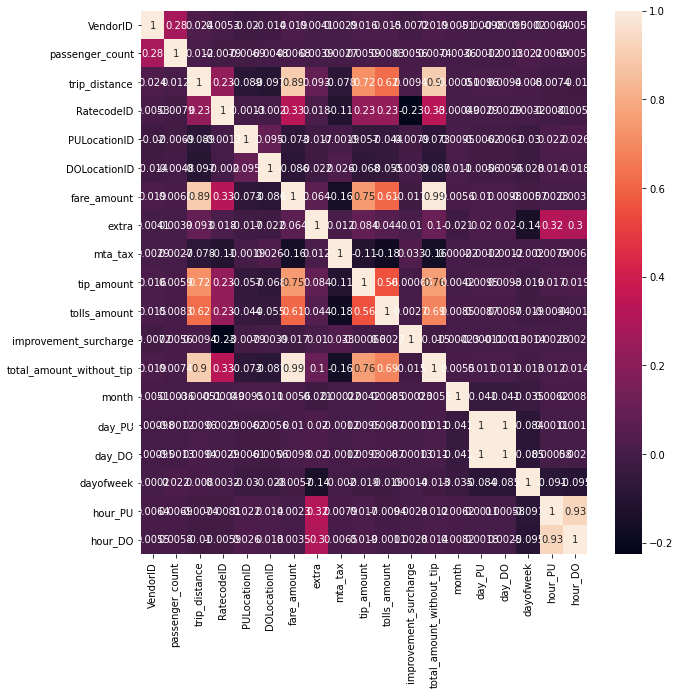

In [61]:
#Let's plot the correlation matrix of the columns
df.drop(['total_amount'],axis=1, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Above is the correlation matrix of the data. There are several features that are highly correlated with each other, for example the day of the pickup and dropoff, since the majority of the trips are short.

The tip_amount is correlated with the trip_distance, the fare_amount, and the total_amount_without_tip, which makes sense, since most people calculates the tip from the amount they need to pay. None of the features correlate with the location of the pickup or dropoff.

### Summary

In this notebook I took a quick look at the NYC yellow taxi data. From the document describing the data, and the data ifself, it is clear that only the trips paid by credit card are important for our problem. 

Within the data there are few missing or strange entries. There are entries where the amount of tip is higher than the total fare, there are extremely high cost per mile trips, etc. Fortunately, these strange entries are very rare. Usually such a low percentage do not need to be fixed to achieve a good model, on the contrary, sometimes they can be useful to simulate real world cases.

From the analysis it is clear that the amount of tip given is most correlated with the total fare of the taxi ride, the rest of the features are only weakly correlated.

The next step in the next notebook is to create a model that is able to predict the amount of the tip.